In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_gabor(theta):
    lamda = 1
    sigma = 1
    X = np.arange(-5,5,0.01)
    Y = np.arange(-5,5,0.01)
    X,Y = np.meshgrid(X,Y)
    X_dot = X*np.cos(theta)+Y*np.sin(theta)
    Y_dot = -X*np.sin(theta)+Y*np.cos(theta)
    G = np.exp(-(X_dot**2+lamda*Y_dot**2)/(2*sigma**2))*np.cos(2*np.pi*X_dot/lamda)
    return G-np.mean(G)

[]

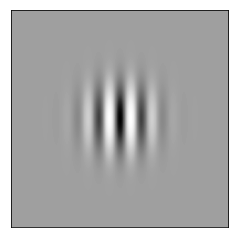

In [3]:
G1 = generate_gabor(np.pi)
fig,ax = plt.subplots(1)
ax.set_box_aspect(1)
ax.matshow(G1,cmap='Greys')
ax.set_xticks([])
ax.set_yticks([])

In [4]:
G_array = np.zeros((10**6,180))
for i in range(180):
    theta_i = i/180*np.pi
    G_i = generate_gabor(theta_i)
    G_i = G_i/np.linalg.norm(G_i)
    G_array[:,i] = G_i.reshape(-1)

[]

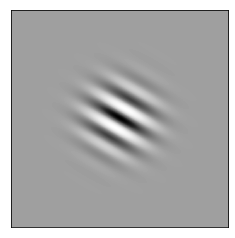

In [5]:
fig,ax = plt.subplots(1)
ax.set_box_aspect(1)
ax.matshow((G_array[:,120]).reshape(1000,1000),cmap='Greys')
ax.set_xticks([])
ax.set_yticks([])

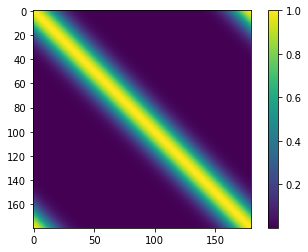

In [6]:
plt.imshow(G_array.T@G_array)
plt.colorbar()

33.5


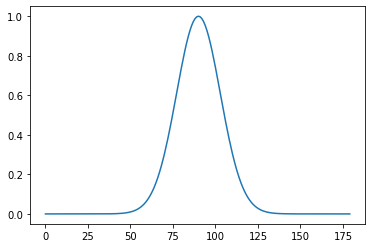

In [9]:
plt.plot(G_array.T@G_array[:,90])
print(len(np.where(G_array.T@G_array[:,90]>0.04)[0])/2)